In [1]:
print ("hello")

hello


## Hello World Librosa Example

In [14]:
import librosa
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


Duration: 25.03 sec
SampleRate: 22050.00 Hz
Estimated tempo: 136.00 beats per minute


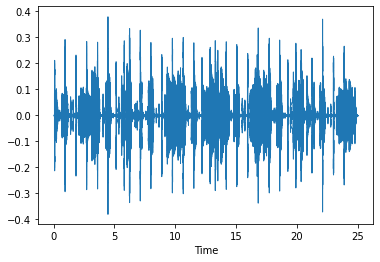

In [33]:
# Beat tracking example
import librosa

# 1. Get the file path to an included audio example
filename = librosa.example('choice')

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 5. Print the metadata
librosa.display.waveshow(y)
# print('Duration: {:.2f} sec'.format(librosa.get_duration(filename=filename)))
print('Duration: {:.2f} sec'.format(librosa.get_duration(y=y, sr=sr)))
print('SampleRate: {:.2f} Hz'.format(librosa.get_samplerate(path=filename)))
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))



## Simple beat detect

std: 0.01 sec


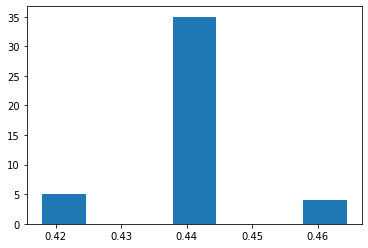

In [63]:
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load(librosa.ex('choice'), duration=20)
# track the beats
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# get the timestamp of the beats (s)
beats_timestamp = librosa.frames_to_time(beats, sr=sr)

# get the deltas, this is time between the beats
# cast to float32, float64 returns overcommit problems
deltas_timestamp = np.float32(np.diff(beats_timestamp))

# calculate average beat period and standard deviation
deltas_avg = np.average(deltas_timestamp)
deltas_std = np.std(deltas_timestamp)

print ("std: {:.2f} sec".format(deltas_std))

# bins is the x-axis range
plt.hist(deltas_timestamp, bins='auto')
plt.show()

# beats
# array([  3,  21,  40,  59,  78,  96, 116, 135, 154, 173, 192, 211,
#       230, 249, 268, 287, 306, 325, 344, 363])


# Track beats using a pre-computed onset envelope
#onset_env = librosa.onset.onset_strength(y=y, sr=sr,
#                                         aggregate=np.median)



Sample: samples/snare-120.wav
Average: 0.499229 sec
Standard deviation 0.015164 sec


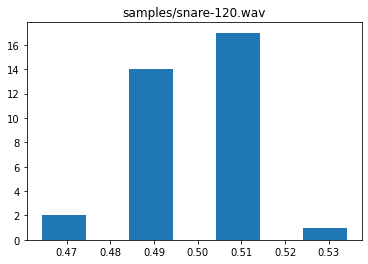

Sample: samples/snare-120-2.wav
Average: 0.498618 sec
Standard deviation 0.012759 sec


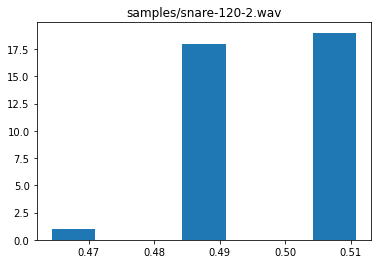

Sample: samples/hihat-120.wav
Average: 0.500464 sec
Standard deviation 0.012498 sec


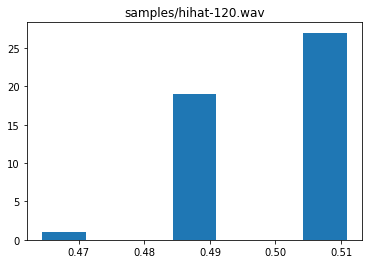

Sample: samples/bd-120.wav
Average: 0.499782 sec
Standard deviation 0.018436 sec


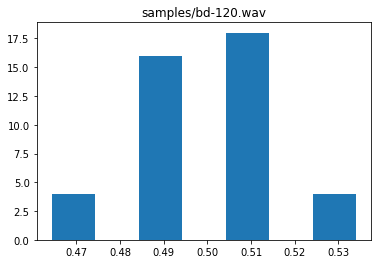

Sample: samples/beat-120.wav
Average: 0.498336 sec
Standard deviation 0.015639 sec


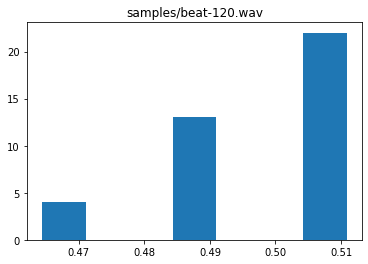

In [65]:
import librosa
import matplotlib.pyplot as plt

def load_sample(name):
    return librosa.load(name)
    
def get_time_between_beats(y, sr):
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    beats_timestamp = librosa.frames_to_time(beats, sr=sr)
    deltas_timestamp = np.float32(np.diff(beats_timestamp))
    return beats_timestamp, deltas_timestamp

def plot_histogram(deltas, sample = 'default'):
    # bins is the x-axis range
    plt.hist(deltas, bins='auto')
    plt.title(sample)
    plt.show()

samples = ['samples/snare-120.wav',
        'samples/snare-120-2.wav', 
        'samples/hihat-120.wav', 
        'samples/bd-120.wav',
        'samples/beat-120.wav']

for sample in samples:
    y, sr = load_sample(sample)
    timestamp,deltas = get_time_between_beats(y, sr)
    print ('Sample:', sample)
    print('Average: {:.6f} sec'.format(np.average(deltas)))
    print('Standard deviation {:.6f} sec'.format(np.std(deltas)))
    plot_histogram(deltas, sample)
    
    